# Data Science Unit 4 Sprint Challenge 1 — Tree Ensembles

### Chicago Food Inspections

For this Sprint Challenge, you'll use a dataset with information from inspections of restaurants and other food establishments in Chicago from January 1, 2010 to the present. 

[See this PDF](https://data.cityofchicago.org/api/assets/BAD5301B-681A-4202-9D25-51B2CAE672FF) for descriptions of the data elements included in this dataset.

According to [Chicago Department of Public Health — Food Protection Services](https://www.chicago.gov/city/en/depts/cdph/provdrs/healthy_restaurants/svcs/food-protection-services.html), "Chicago is home to 16,000 food establishments like restaurants, grocery stores, bakeries, wholesalers, lunchrooms, mobile food vendors and more. Our business is food safety and sanitation with one goal, to prevent the spread of food-borne disease. We do this by inspecting food businesses, responding to complaints and food recalls." 

#### Your challenge: Predict whether inspections failed

The target is the `Fail` column.

- When the food establishment failed the inspection, the target is `1`.
- When the establishment passed, the target is `0`.

#### Run this cell to load the data:

In [17]:
import pandas as pd
pd.options.display.max_columns = 200
pd.options.display.max_rows = 200
import category_encoders as ce
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier



In [2]:
train_url = 'https://drive.google.com/uc?export=download&id=13_tP9JpLcZHSPVpWcua4t2rY44K_s4H5'
test_url  = 'https://drive.google.com/uc?export=download&id=1GkDHjsiGrzOXoF_xcYjdzBTSjOIi3g5a'

train = pd.read_csv(train_url)
test  = pd.read_csv(test_url)

assert train.shape == (51916, 17)
assert test.shape  == (17306, 17)




In [3]:
test.head(1000)

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Violations,Latitude,Longitude,Location,Fail
0,114835,7 - ELEVEN,7 - ELEVEN,46907.0,Grocery Store,Risk 2 (Medium),600 S DEARBORN,CHICAGO,IL,60605.0,2011-03-22T00:00:00,Canvass,33. FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSI...,41.874481,-87.629357,"{'longitude': '-87.62935653990546', 'latitude'...",0
1,1575555,TAQUERIA LOS GALLOS INC,TAQUERIA LOS GALLOS,1044860.0,Restaurant,Risk 1 (High),4209-4211 W 26TH ST,CHICAGO,IL,60623.0,2015-09-15T00:00:00,Canvass,"30. FOOD IN ORIGINAL CONTAINER, PROPERLY LABEL...",41.844070,-87.729807,"{'longitude': '-87.72980747367433', 'latitude'...",0
2,671061,TROTTER'S TO GO,TROTTER'S TO GO,1092634.0,Restaurant,Risk 1 (High),1337 W FULLERTON AVE,CHICAGO,IL,60614.0,2012-03-02T00:00:00,Canvass,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",41.925128,-87.662041,"{'longitude': '-87.66204067083224', 'latitude'...",0
3,1965844,BIG G'S PIZZA,BIG G'S PIZZA,2334691.0,Restaurant,Risk 1 (High),1132 W TAYLOR ST,CHICAGO,IL,60607.0,2016-10-04T00:00:00,Canvass Re-Inspection,"14. PREVIOUS SERIOUS VIOLATION CORRECTED, 7-42...",41.869546,-87.655501,"{'longitude': '-87.65550098867566', 'latitude'...",1
4,1751669,SOUTH CENTRAL COMMUNITY SERVICES ELEMENTARY,SOUTH CENTRAL COMMUNITY SERVICES ELEMENTARY,3491970.0,School,Risk 2 (Medium),1021 E 83RD,CHICAGO,IL,60619.0,2016-04-08T00:00:00,Canvass,18. NO EVIDENCE OF RODENT OR INSECT OUTER OPEN...,41.743933,-87.599291,"{'longitude': '-87.59929083361996', 'latitude'...",1
5,1134345,STARBUCKS COFFEE #229,STARBUCKS,23039.0,Restaurant,Risk 2 (Medium),222 W MERCHANDISE MART PLZ,CHICAGO,IL,60654.0,2012-06-21T00:00:00,Canvass,38. VENTILATION: ROOMS AND EQUIPMENT VENTED AS...,41.888074,-87.634955,"{'longitude': '-87.63495520292739', 'latitude'...",0
6,2104569,"BOURGEOIS PIG ! COFFEE, TEA & SPICES CO.","BOURGEOIS PIG ! COFFEE, TEA & SPICES CO.",39259.0,Restaurant,Risk 1 (High),738 W FULLERTON PKWY,CHICAGO,IL,60614.0,2017-11-13T00:00:00,Complaint,29. PREVIOUS MINOR VIOLATION(S) CORRECTED 7-42...,41.925576,-87.647858,"{'longitude': '-87.64785830762409', 'latitude'...",1
7,2145431,CRIO,CRIO,11583.0,Restaurant,Risk 1 (High),2506-2508 N CLYBOURN AVE,CHICAGO,IL,60614.0,2018-02-23T00:00:00,Canvass Re-Inspection,"30. FOOD IN ORIGINAL CONTAINER, PROPERLY LABEL...",41.926985,-87.672103,"{'longitude': '-87.67210268081504', 'latitude'...",0
8,1938250,NEW YORK MARKET,NEW YORK MARKET,1224659.0,Grocery Store,Risk 2 (Medium),3660 N LAKE SHORE DR,CHICAGO,IL,60613.0,2016-07-13T00:00:00,Canvass,33. FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSI...,41.950173,-87.644548,"{'longitude': '-87.6445481581548', 'latitude':...",0
9,1763539,SONIA SHANKMAN ORTHOGENIC SCHOOL AT U OF C,SONIA SHANKMAN ORTHOGENIC SCHOOL AT U OF C,3247569.0,School,Risk 1 (High),6245 S INGLESIDE AVE,CHICAGO,IL,60637.0,2016-04-25T00:00:00,Canvass,22. DISH MACHINES: PROVIDED WITH ACCURATE THER...,41.780885,-87.602545,"{'longitude': '-87.60254481037458', 'latitude'...",1


In [4]:
train.isnull().sum(axis = 0)

Inspection ID         0
DBA Name              0
AKA Name            623
License #             5
Facility Type       224
Risk                 12
Address               0
City                 53
State                10
Zip                  26
Inspection Date       0
Inspection Type       1
Violations         9655
Latitude            198
Longitude           198
Location            198
Fail                  0
dtype: int64

In [5]:
X_train = train.drop('Fail', axis=1)
X_test = test.drop('Fail', axis=1)
y_train = train['Fail']
y_test = test['Fail']

In [6]:
X_train['Violations'] = X_train['Violations'].fillna('No Violations')
X_train


,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Violations,Latitude,Longitude,Location
0,2088270,"TOM YUM RICE & NOODLE, INC.",TOM YUM CAFE,2354911.0,Restaurant,Risk 1 (High),608 W BARRY,CHICAGO,IL,60657.0,2017-09-15T00:00:00,Canvass,3. POTENTIALLY HAZARDOUS FOOD MEETS TEMPERATUR...,41.938007,-87.644755,"{'longitude': '-87.6447545707008', 'latitude':..."
1,555268,FILLING STATION & CONVENIENCE STORE,FILLING STATION & CONVENIENCE STORE,1044901.0,Grocery Store,Risk 3 (Low),6646-6658 S WESTERN AVE,CHICAGO,IL,60636.0,2011-10-20T00:00:00,Complaint Re-Inspection,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,41.772402,-87.683603,"{'longitude': '-87.68360273081268', 'latitude'..."
2,1751394,A P DELI,A P DELI,47405.0,Restaurant,Risk 1 (High),2025 E 75TH ST,CHICAGO,IL,60649.0,2016-04-05T00:00:00,Canvass Re-Inspection,"35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTR...",41.758779,-87.575054,"{'longitude': '-87.57505446746121', 'latitude'..."
3,1763905,FRANK'S CHICAGO SHRIMP HOUSE,FRANK'S CHICAGO SHRIMP HOUSE,6414.0,Restaurant,Risk 2 (Medium),4459 S ARCHER AVE,CHICAGO,IL,60632.0,2016-04-29T00:00:00,Canvass,38. VENTILATION: ROOMS AND EQUIPMENT VENTED AS...,41.812181,-87.707125,"{'longitude': '-87.70712481334274', 'latitude'..."
4,453326,MORRILL,MORRILL,24571.0,School,Risk 1 (High),6011 S Rockwell (2600W) AVE,CHICAGO,IL,60629.0,2011-01-10T00:00:00,Canvass,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",NaN,NaN,NaN
5,1725221,LAKEVIEW REHABILITATION AND NURSING CENTER,LAKEVIEW REHABILITATION AND NURSING CENTER,2245580.0,Long Term Care,Risk 1 (High),735 W DIVERSEY PKWY,CHICAGO,IL,60614.0,2016-02-22T00:00:00,Canvass,31. CLEAN MULTI-USE UTENSILS AND SINGLE SERVIC...,41.932632,-87.647973,"{'longitude': '-87.64797278441709', 'latitude'..."
6,1981372,GOLD COAST DOGS,GOLD COAST DOGS,32318.0,Restaurant,Risk 2 (Medium),225 S CANAL ST,CHICAGO,IL,60606.0,2017-01-12T00:00:00,Canvass,"30. FOOD IN ORIGINAL CONTAINER, PROPERLY LABEL...",41.878531,-87.639427,"{'longitude': '-87.63942745962717', 'latitude'..."
7,1072403,HAPPY PIZZA,NaN,2241028.0,Restaurant,Risk 1 (High),8710 S HALSTED ST,CHICAGO,IL,60620.0,2013-05-07T00:00:00,License Re-Inspection,38. VENTILATION: ROOMS AND EQUIPMENT VENTED AS...,41.735505,-87.643749,"{'longitude': '-87.64374906595162', 'latitude'..."
8,1464616,THE PUMPING CO INC,THE PUMPING CO,1544937.0,Restaurant,Risk 1 (High),6157 N BROADWAY,CHICAGO,IL,60660.0,2014-11-28T00:00:00,Canvass,"16. FOOD PROTECTED DURING STORAGE, PREPARATION...",41.993973,-87.660242,"{'longitude': '-87.66024237516903', 'latitude'..."
9,583261,YUMMY YUMMY NOODLES,YUMMY YUMMY NOODLES,2098003.0,Restaurant,Risk 1 (High),2002 S WENTWORTH AVE,CHICAGO,IL,60616.0,2011-06-01T00:00:00,License,18. NO EVIDENCE OF RODENT OR INSECT OUTER OPEN...,41.855282,-87.631993,"{'longitude': '-87.63199264229414', 'latitude'..."


In [7]:
def wrangle(X):
    X = X.copy()
    
    # Drop irrelevant columns
    X = X.drop(columns = ['Inspection ID', 'AKA Name', 'License #', 'Address', 'City', 'State', 'Latitude', 'Longitude', 'Location']) 
    
    # Change NaN in violations to no violations
    X['Violations'] = X['Violations'].fillna('No Violations')
    
    # Remaining NaN....
    #Facility Type       224
    #Risk                 12
    #Zip                  26
    #Inspection Type       1
    
    X = X.fillna('Unknown')
            
    # return wrangled data frame
    return X

X_train = wrangle(X_train)
X_test = wrangle(X_test)
X_train.shape, X_test.shape

((51916, 7), (17306, 7))

In [8]:
# Random Forest Improves ROC AUC compared to Decision Tree

from sklearn.ensemble import RandomForestClassifier

pipe = make_pipeline(
       ce.OrdinalEncoder(),
       RandomForestClassifier(
       n_estimators = 100,
       class_weight = 'balanced',
       min_samples_leaf = .005,
       oob_score = True,
       n_jobs = -1))

cross_val_score(pipe, X_train, y_train, cv=5, scoring='roc_auc', verbose = 10)

[CV]  ................................................................
[CV] ....................... , score=0.6574230824960192, total=   1.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


[CV] ....................... , score=0.6482631344425237, total=   1.8s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.7s remaining:    0.0s


[CV] ....................... , score=0.6564331203103372, total=   1.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.6s remaining:    0.0s


[CV] ....................... , score=0.6597570144461814, total=   2.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    7.7s remaining:    0.0s


[CV] ....................... , score=0.6689851000017901, total=   1.9s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    9.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    9.6s finished


array([0.65742308, 0.64826313, 0.65643312, 0.65975701, 0.6689851 ])

In [9]:
m = pipe.fit(X_train, y_train)
m

Pipeline(memory=None,
     steps=[('ordinalencoder', OrdinalEncoder(cols=['DBA Name', 'Facility Type', 'Risk', 'Zip', 'Inspection Date', 'Inspection Type', 'Violations'],
        drop_invariant=False, handle_unknown='impute', impute_missing=True,
        mapping=[{'col': 'DBA Name', 'mapping': [('TOM YUM RICE & NOODLE, INC.',...mators=100, n_jobs=-1, oob_score=True, random_state=None,
            verbose=0, warm_start=False))])

In [10]:
from sklearn.metrics import accuracy_score, classification_report, recall_score
#m = RandomForestClassifier(n_estimators=100,min_samples_leaf=3 ,n_jobs=-1,max_features=0.25)
#time m.fit(X1_train, y1_train.values.ravel())
y_pred= m.predict(X_test)
accuracy_score(y_test, y_pred)

0.7401479255749451

In [12]:
encoder = ce.OrdinalEncoder()
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred_proba = gb.predict_proba(X_test)[:,1]
print(roc_auc_score(y_test, y_pred_proba))

0.6974740295957459


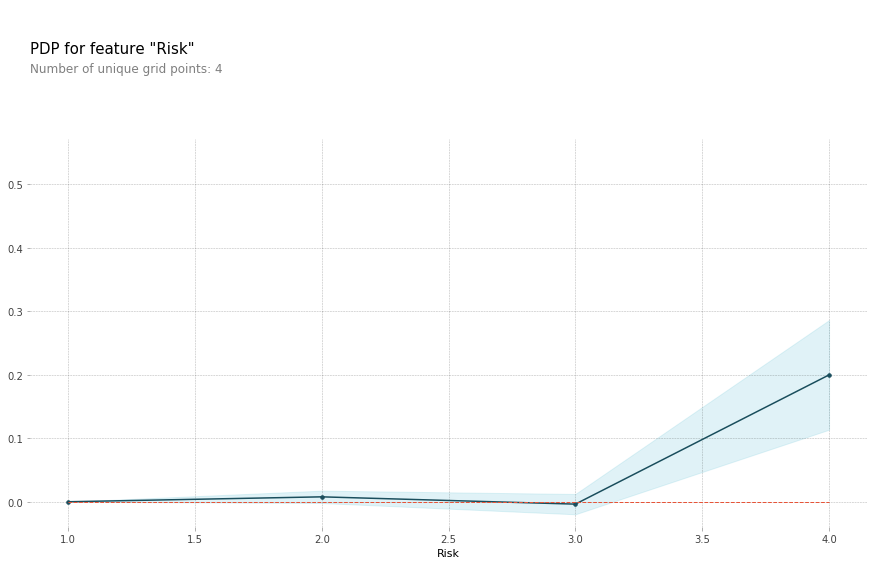

In [14]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature='Risk'
pdp_isolated = pdp_isolate(model=gb, dataset=X_test, 
                           model_features=X_test.columns, feature=feature)
pdp_plot(pdp_isolated, feature);

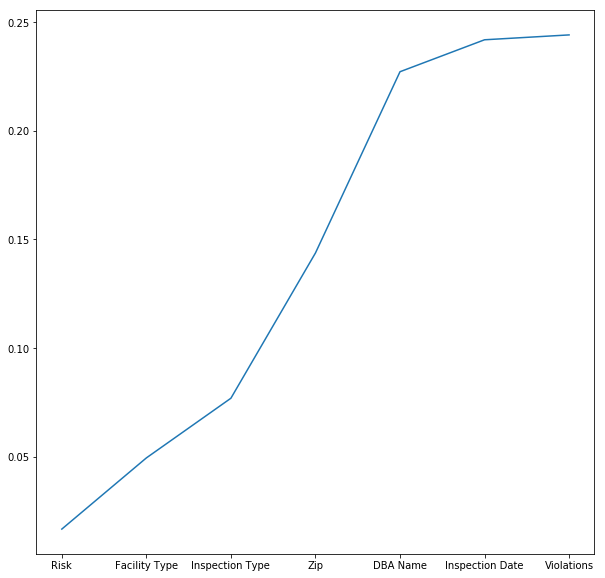

In [31]:
import matplotlib.pyplot as plt
rf = RandomForestClassifier() 
rf.fit(X_train, y_train) 
rf.score(X_test, y_test)

feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance',ascending=True)

from pylab import rcParams
rcParams['figure.figsize'] = 10, 10
plt.plot(feature_importances)


### Part 1: Preprocessing

You may choose which features you want to use, and whether/how you will preprocess them. You may use any tools and techniques for categorical encoding. (Pandas, category_encoders, sklearn.preprocessing, or any other library.)

_To earn a score of 3 for this part, engineer new features, and use any alternative categorical encoding instead of One-Hot or Ordinal/Label encoding._

### Part 2: Modeling

Fit a Random Forest or Gradient Boosting model with the train set. (You may use scikit-learn, xgboost, or any other library.) Use cross-validation to estimate an ROC AUC validation score.

Use your model to predict probabilities for the test set. Get an ROC AUC test score >= 0.60.

_To earn a score of 3 for this part, get an ROC AUC test score >= 0.70._


### Part 3: Visualization

Make one visualization for model interpretation. (You may use any libraries.) Choose one of these types:
- Feature Importances
- Permutation Importances
- Partial Dependence Plot

_To earn a score of 3 for this part, make at least two of these visualization types._